In [22]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.size']=16

In [219]:
N = 200
x_start,x_end = -4.0,4.0
y_start,y_end = -2.0,2.0
x = numpy.linspace(x_start,x_end,N)
y = numpy.linspace(y_start,y_end,N)
X,Y=numpy.meshgrid(x,y)

In [220]:
def get_vel(strength,xs,ys,X,Y):
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    return u,v

In [221]:
def get_stream(strength,xs,ys,X,Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys),(X-xs))
    return psi

In [222]:
def get_potential(strength,xs,ys,X,Y):
    phi = strength/(numpy.pi*2)*numpy.log(numpy.sqrt((X-xs)**2+(Y-ys)**2))
    return phi

# 1a

In [223]:
str_source = 2
x_source,y_source = -2.0,0.0

u_source,v_source = get_vel(str_source,x_source,y_source,X,Y)
psi_source = get_stream(str_source,x_source,y_source,X,Y)

str_sink = -2
x_sink,y_sink = 2.0,0.0

u_sink,v_sink = get_vel(str_sink,x_sink,y_sink,X,Y)
psi_sink = get_stream(str_sink,x_sink,y_sink,X,Y)

u=u_source+u_sink
v=v_source+v_sink
psi = psi_source+psi_sink

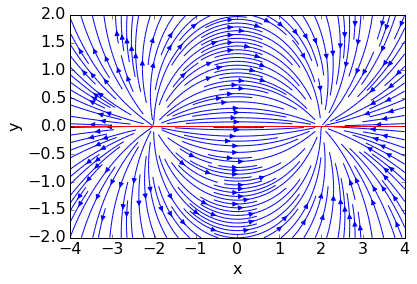

In [224]:
pyplot.streamplot(X,Y,u,v, density=2)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contour(X,Y,psi,levels=[0.], colors='r',linewidth=2);

# 1b

In [225]:
str_sink = -1

u_sink,v_sink = get_vel(str_sink,x_sink,y_sink,X,Y)
psi_sink = get_stream(str_sink,x_sink,y_sink,X,Y)

u= u_source+u_sink
v= v_source+v_sink
psi = psi_source+psi_sink

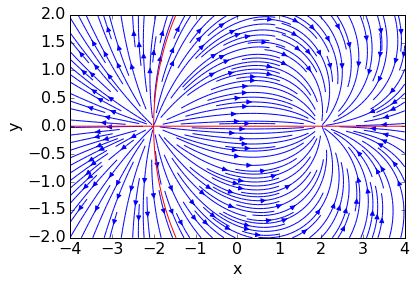

In [226]:
pyplot.streamplot(X,Y,u,v,density=2)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('x')
pyplot.ylabel('y');
pyplot.contour(X,Y,psi,levels=[0.], colors='r',linewidth=2);

# 1c

In [227]:
str_sink = -0.5

u_sink,v_sink=get_vel(str_sink,x_sink,y_sink,X,Y)
psi_sink = get_stream(str_sink,x_sink,y_sink,X,Y)

u=u_source+u_sink
v=v_source+v_sink
psi=psi_source+psi_sink

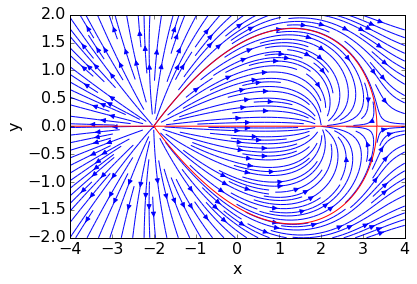

In [228]:
pyplot.streamplot(X,Y,u,v,density=2)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('x')
pyplot.ylabel('y');
pyplot.contour(X,Y,psi,levels=[0.], colors='r',linewidth=2);

# answer this
equal vs unequal source/sink strengths
- When equal, all of source flows into sink
- When not equal, part of source flows into sink, while the rest of the flow goes elsewhere

why does it split into two regions?
- the source is stronger than the sink; not all of the flow from the source will be sucked in by the sink.

How much of the flow from the source enters each region?
- ratio between the strengths; about 1/4 into sink, rest elsewhere

http://web.mit.edu/fluids-modules/www/potential_flows/LecturesHTML/lec1011/node27.html

# 2

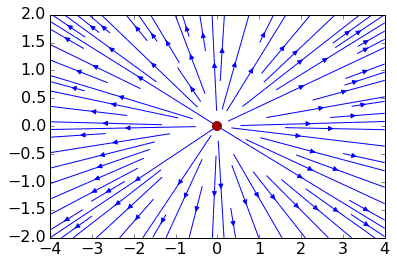

In [262]:
str_source = 1.0
x_source, y_source = 0.0,0.0
u_source,v_source= get_vel(str_source,x_source,y_source,X,Y)

pyplot.streamplot(X,Y,u_source,v_source)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.scatter(x_source,y_source,color ='#990000', marker='o', s=80);

In [263]:
numpy.shape(v_source)

(200, 200)

In [264]:
dx=8/(N-1)
dy=4/(N-1)
print(dy)

0.020100502512562814


In [265]:
#large box around source
flux = (sum(numpy.absolute(u_source[75:126,75]))*dy)+(sum(numpy.absolute(u_source[75:126,125]))*dy)+\
        (sum(numpy.absolute(v_source[75,75:126]))*dx)+(sum(numpy.absolute(v_source[125,75:126]))*dx)



In [266]:
print(flux)

1.01012089276


In [269]:
#small box around source
fluxor = (sum(numpy.absolute(u_source[90:111,90]))*dy)+(sum(numpy.absolute(u_source[90:111,110]))*dy)+\
        (sum(numpy.absolute(v_source[90,90:111]))*dx)+(sum(numpy.absolute(v_source[110,90:111]))*dx)

In [270]:
print(fluxor)

1.02508421158


The numerically calculated flux is close to the source strength. It is slightly higher than what I expected. The outward flux should not be different at different distances from the source, but in this case, the flux appears to increase as the region moves in closer to the source.

# 3

In [285]:
#Set up source str and loc
str_source1 = 0.5
x_source1,y_source1 = -2.0,1.5
str_source2 = 1.0
x_source2,y_source2 = -1.5,1.0
str_source3 = 1.5
x_source3,y_source3 = -0.5,0.0
#Set up sink str and loc
str_sink1 = -0.5
x_sink1,y_sink1 = 2.0,-1.5
str_sink2 = -1.0
x_sink2,y_sink2 = 1.5,-1.0
str_sink3 = -1.5
x_sink3,y_sink3 = 0.5,0.0
#x1=numpy.linspace(-10,10,N)
#y1= numpy.linspace(-10,10,N)
#X1,Y1=numpy.meshgrid(x1,y1)

In [286]:
u_source1,v_source1 = get_vel(str_source1,x_source1,y_source1,X,Y)
u_source2,v_source2 = get_vel(str_source2,x_source2,y_source2,X,Y)
u_source3,v_source3 = get_vel(str_source3,x_source3,y_source3,X,Y)
u_sink1,v_sink1 = get_vel(str_sink1,x_sink1,y_sink1,X,Y)
u_sink2,v_sink2 = get_vel(str_sink2,x_sink2,y_sink2,X,Y)
u_sink3,v_sink3 = get_vel(str_sink3,x_sink3,y_sink3,X,Y)

In [287]:
u = u_source1+u_source2+u_source3+u_sink1+u_sink2+u_sink3
v = v_source1+v_source2+v_source3+v_sink1+v_sink2+v_sink3

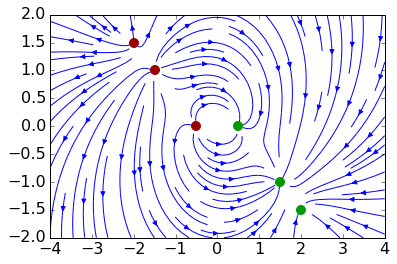

In [288]:
pyplot.streamplot(X,Y,u,v)
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end);
pyplot.scatter(x_source1,y_source1, color='#990000',s=80)
pyplot.scatter(x_source2,y_source2,color='#990000',s=80)
pyplot.scatter(x_source3,y_source3,color='#990000',s=80)
pyplot.scatter(x_sink1,y_sink1,color='#009900',s=80)
pyplot.scatter(x_sink2,y_sink2,color='#009900',s=80)
pyplot.scatter(x_sink3,y_sink3,color='#009900',s=80);

In [289]:
Y[190,190]

1.8190954773869348

In [290]:
flux = sum(numpy.absolute(u[10:191,10]))*dy+sum(numpy.absolute(u[10:191,190]))*dy+\
        sum(numpy.absolute(v[10,10:191]))*dx+sum(numpy.absolute(v[190,10:191]))*dx

In [291]:
print(flux)

2.14381600227


This answer makes some sense? I was not sure what the flux should have been, but depending on the position of each source/strength and its corresponding strength, it seems that there is an overall strength of ~2?

# 4a

In [119]:
str_source = 2
x_source,y_source = -2.0,0.0
u_source,v_source = get_vel(str_source,x_source,y_source,X,Y)

str_sink = -2
x_sink,y_sink = 2.0,0.0
u_sink,v_sink = get_vel(str_sink,x_sink,y_sink,X,Y)

u=u_source+u_sink
v=v_source+v_sink
phi_source = get_potential(str_source,x_source,y_source,X,Y)
phi_sink = get_potential(str_sink,x_sink,y_sink,X,Y)
phi = phi_source+phi_sink

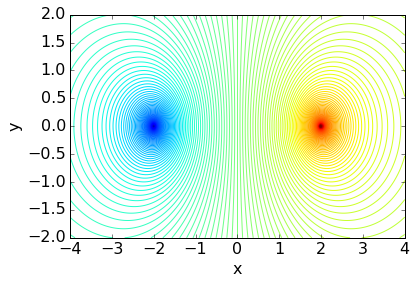

In [121]:
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contour(X,Y,phi,200,linewidth=2,linestyles='solid');

# 4b

In [122]:
str_sink = -1

u_sink,v_sink = get_vel(str_sink,x_sink,y_sink,X,Y)

u= u_source+u_sink
v= v_source+v_sink
phi_sink = get_potential(str_sink,x_sink,y_sink,X,Y)
phi = phi_sink+phi_source

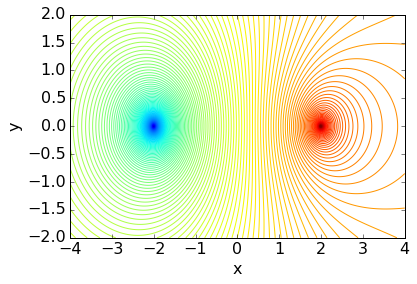

In [123]:
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contour(X,Y,phi,200,linewidth=2,linestyles='solid');

# 4c

In [124]:
str_sink = -0.5

u_sink,v_sink=get_vel(str_sink,x_sink,y_sink,X,Y)

u=u_source+u_sink
v=v_source+v_sink
phi_sink = get_potential(str_sink,x_sink,y_sink,X,Y)
phi = phi_source+phi_sink

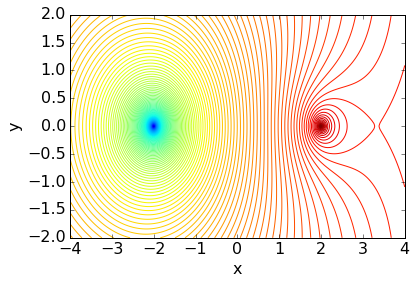

In [125]:
pyplot.xlim(x_start,x_end)
pyplot.ylim(y_start,y_end)
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.contour(X,Y,phi,200,linewidth=2,linestyles='solid');

Potential lines are perpendicular to the velocity lines